In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import torch
%matplotlib inline

In [30]:
df_train_data=pd.read_csv("data/sensor_train.csv")
df_test_data=pd.read_csv("data/sensor_test.csv")

In [31]:
df_train_data.head()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
0,0,27,0.3,-0.3,0.1,0.6,4.5,8.8,0
1,0,108,0.1,-0.0,-0.4,0.4,4.7,8.4,0
2,0,198,0.1,0.0,0.3,0.9,4.6,9.0,0
3,0,297,0.1,-0.1,-0.5,0.8,4.7,7.2,0
4,0,388,0.1,0.2,0.6,0.9,4.7,8.9,0


In [32]:
df_test_data.head()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg
0,0,71,0.2,1.0,0.6,0.2,5.3,9.2
1,0,150,0.0,1.0,-0.7,0.2,6.0,8.2
2,0,244,-0.2,0.8,-2.4,-0.4,5.3,7.6
3,0,326,2.3,-0.4,-1.6,2.5,4.5,3.4
4,0,409,-0.3,-1.4,3.3,0.2,3.5,12.4


In [33]:
df_test_data["fragment_id"].value_counts()

4669    61
4533    61
5479    60
4903    60
4708    60
        ..
3348    49
4349    49
6502    49
4945    49
152     49
Name: fragment_id, Length: 7500, dtype: int64

In [34]:
df_train_data.describe()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
count,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000,425359.000000
mean,3647.035972,2500.952026,0.009635,-0.063114,0.024548,0.965656,2.730190,7.825065,8.535035
std,2103.253140,1442.307956,0.619285,0.537614,0.717009,3.295531,2.978134,2.653261,5.395264
min,0.000000,0.000000,-14.700000,-14.700000,-12.600000,-19.800000,-16.900000,-8.900000,0.000000
25%,1822.000000,1252.000000,-0.100000,-0.100000,-0.200000,-0.700000,0.400000,7.300000,4.000000
50%,3646.000000,2501.000000,0.000000,0.000000,0.000000,0.200000,2.700000,8.700000,8.000000
75%,5466.000000,3749.000000,0.100000,0.100000,0.200000,2.000000,4.900000,9.400000,13.000000
max,7291.000000,4999.000000,34.500000,13.400000,28.200000,30.200000,14.400000,38.100000,18.000000


In [35]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425359 entries, 0 to 425358
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fragment_id  425359 non-null  int64  
 1   time_point   425359 non-null  int64  
 2   acc_x        425359 non-null  float64
 3   acc_y        425359 non-null  float64
 4   acc_z        425359 non-null  float64
 5   acc_xg       425359 non-null  float64
 6   acc_yg       425359 non-null  float64
 7   acc_zg       425359 non-null  float64
 8   behavior_id  425359 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 29.2 MB


In [36]:
df_train_data.nunique()

fragment_id    7292
time_point     5000
acc_x           212
acc_y           159
acc_z           218
acc_xg          300
acc_yg          272
acc_zg          284
behavior_id      19
dtype: int64

In [37]:
df_train_data.isnull().sum()

fragment_id    0
time_point     0
acc_x          0
acc_y          0
acc_z          0
acc_xg         0
acc_yg         0
acc_zg         0
behavior_id    0
dtype: int64

In [38]:
df_train_data.sort_values(by=["fragment_id","time_point"])

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
0,0,27,0.3,-0.3,0.1,0.6,4.5,8.8,0
1,0,108,0.1,-0.0,-0.4,0.4,4.7,8.4,0
2,0,198,0.1,0.0,0.3,0.9,4.6,9.0,0
3,0,297,0.1,-0.1,-0.5,0.8,4.7,7.2,0
4,0,388,0.1,0.2,0.6,0.9,4.7,8.9,0
...,...,...,...,...,...,...,...,...,...
425354,7291,4561,-0.1,-0.5,-1.7,-0.2,3.4,7.4,18
425355,7291,4647,0.7,-1.9,1.1,0.5,1.7,10.7,18
425356,7291,4735,1.3,-1.4,-0.5,1.4,2.1,8.0,18
425357,7291,4830,1.2,-1.6,-0.1,1.6,1.8,9.2,18


In [39]:
df_train_data[df_train_data.fragment_id==0].shape

(57, 9)

In [40]:
fragment_count=df_train_data["fragment_id"].value_counts().reset_index(name="count").sort_values(by="index")
fragment_count.columns=["fragment_id","count"]
fragment_count.head()

,fragment_id,count
5767,0,57
6699,1,56
5418,2,57
6962,3,55
6891,4,55


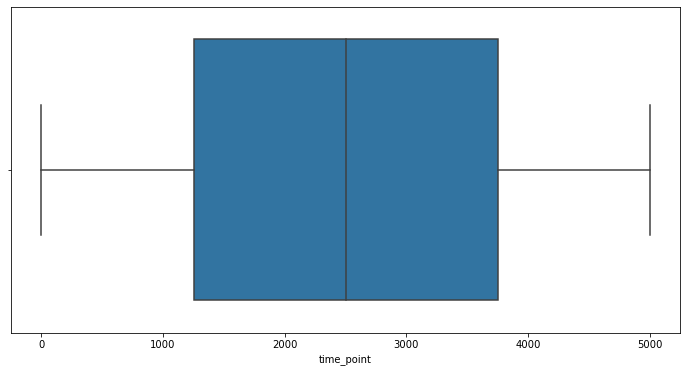

In [41]:
plt.figure(figsize = [12,6])
sns.boxplot(df_train_data['time_point'])

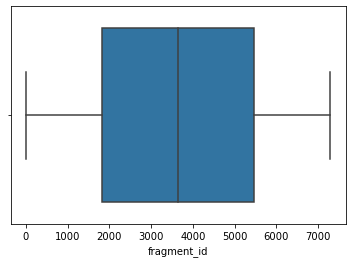

In [42]:
sns.boxplot(df_train_data['fragment_id'])

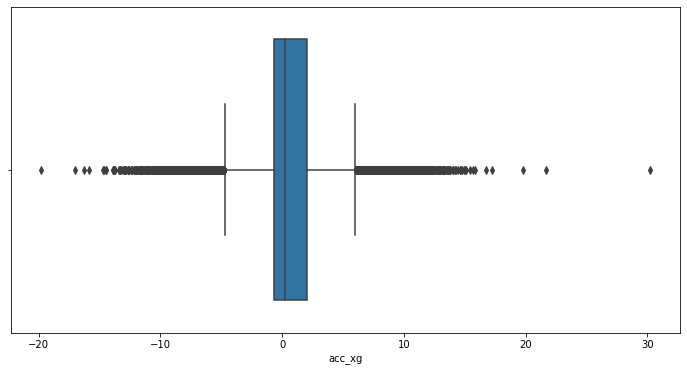

In [43]:
plt.figure(figsize = [12,6])
sns.boxplot(df_train_data['acc_xg'])

In [44]:
df_label = df_train_data.groupby(['fragment_id'])['behavior_id'].agg({'count','first'}).reset_index()
df_label.columns = ['fragment_id','behavior_count','behavior_id']
df_label.head()

,fragment_id,behavior_count,behavior_id
0,0,0,57
1,1,0,56
2,2,0,57
3,3,0,55
4,4,0,55


In [45]:
df_label['behavior_id'].value_counts()

60    2600
58    1928
57    1346
59     751
56     224
54     179
55     151
53      69
52      17
51      10
50       9
61       8
Name: behavior_id, dtype: int64

In [54]:
#A,B,C分别代表行走、站立、坐卧
mapping = {0: 'A_0', 1: 'A_1', 2: 'A_2', 3: 'A_3', 
        4: 'D_4', 5: 'A_5', 6: 'B_1',7: 'B_5', 
        8: 'B_2', 9: 'B_3', 10: 'B_0', 11: 'A_6', 
        12: 'C_1', 13: 'C_3', 14: 'C_0', 15: 'B_6', 
        16: 'C_2', 17: 'C_5', 18: 'C_6'}
df_label['first_behavior'] = df_label['behavior_id'].map(mapping).apply(lambda x:x[0])
df_label['second_behavior'] = df_label['behavior_id'].map(mapping).apply(lambda x:x[-1])
df_label

TypeError: 'float' object is not subscriptable

In [51]:
df_label['first_behavior'].value_counts()

KeyError: 'first_behavior'

In [52]:
df_label['second_behavior'].value_counts()

KeyError: 'second_behavior'

In [55]:
mapping = {0: 'A_0', 1: 'A_1', 2: 'A_2', 3: 'A_3', 
        4: 'D_4', 5: 'A_5', 6: 'B_1',7: 'B_5', 
        8: 'B_2', 9: 'B_3', 10: 'B_0', 11: 'A_6', 
        12: 'C_1', 13: 'C_3', 14: 'C_0', 15: 'B_6', 
        16: 'C_2', 17: 'C_5', 18: 'C_6'}
df_train_data['first_behavior'] = df_train_data['behavior_id'].map(mapping).apply(lambda x: x[0])
df_train_data['second_behavior'] = df_train_data['behavior_id'].map(mapping).apply(lambda x: x[-1])
df_train_data[df_train_data["second_behavior"]=="1"]

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id,first_behavior,second_behavior
13865,241,72,0.3,0.3,-0.2,1.2,5.8,7.5,1,A,1
13866,241,166,-0.0,-0.0,-0.1,0.9,5.6,7.7,1,A,1
13867,241,253,-0.4,-0.0,0.2,0.5,5.6,8.0,1,A,1
13868,241,340,-0.1,-0.0,0.0,0.8,5.6,7.7,1,A,1
13869,241,429,-0.2,0.0,-0.2,0.6,5.7,7.6,1,A,1
...,...,...,...,...,...,...,...,...,...,...,...
317920,5447,4603,0.6,-0.2,-0.3,-2.9,1.0,8.8,12,C,1
317921,5447,4698,0.6,-0.4,-0.5,-2.7,1.0,8.4,12,C,1
317922,5447,4788,0.3,-0.0,0.3,-3.0,1.0,9.2,12,C,1
317923,5447,4870,-0.2,-0.1,0.1,-3.3,0.8,9.2,12,C,1


In [56]:
from sklearn.linear_model import LogisticRegression
x=df_train_data.iloc[:,1:8].values
x

array([[ 2.700e+01,  3.000e-01, -3.000e-01, ...,  6.000e-01,  4.500e+00,
         8.800e+00],
       [ 1.080e+02,  1.000e-01, -0.000e+00, ...,  4.000e-01,  4.700e+00,
         8.400e+00],
       [ 1.980e+02,  1.000e-01,  0.000e+00, ...,  9.000e-01,  4.600e+00,
         9.000e+00],
       ...,
       [ 4.735e+03,  1.300e+00, -1.400e+00, ...,  1.400e+00,  2.100e+00,
         8.000e+00],
       [ 4.830e+03,  1.200e+00, -1.600e+00, ...,  1.600e+00,  1.800e+00,
         9.200e+00],
       [ 4.917e+03,  1.200e+00, -1.700e+00, ...,  1.800e+00,  1.400e+00,
         9.600e+00]])

In [57]:
y=df_train_data["behavior_id"].values
y

array([ 0,  0,  0, ..., 18, 18, 18], dtype=int64)

In [58]:
clf =LogisticRegression()
clf.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [59]:
from sklearn.metrics import classification_report
prediction=clf.predict(x)
print(classification_report(y,prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13865
           1       0.15      0.17      0.16     39567
           2       0.22      0.43      0.29     23745
           3       0.00      0.00      0.00     19392
           4       0.12      0.04      0.06     25012
           5       0.23      0.24      0.23     19987
           6       0.17      0.65      0.27     43646
           7       0.00      0.00      0.00     13864
           8       0.12      0.03      0.05     19250
           9       0.00      0.00      0.00     16848
          10       0.00      0.00      0.00     13655
          11       0.39      0.38      0.38     26119
          12       0.18      0.25      0.21     42975
          13       0.00      0.00      0.00     17006
          14       0.00      0.00      0.00      7061
          15       0.33      0.15      0.20     27913
          16       0.20      0.25      0.22     20197
          17       0.00    

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x,y)
clf.predict_proba(x)
prediction=clf.predict(x)
print(classification_report(y,prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     13865
           1       0.00      0.00      0.00     39567
           2       0.28      0.85      0.42     23745
           3       0.00      0.00      0.00     19392
           4       0.67      0.01      0.02     25012
           5       0.00      0.00      0.00     19987
           6       0.19      0.91      0.31     43646
           7       0.00      0.00      0.00     13864
           8       0.00      0.00      0.00     19250
           9       0.00      0.00      0.00     16848
          10       0.00      0.00      0.00     13655
          11       0.55      0.31      0.39     26119
          12       0.26      0.54      0.35     42975
          13       0.00      0.00      0.00     17006
          14       0.00      0.00      0.00      7061
          15       0.39      0.23      0.29     27913
          16       0.47      0.35      0.40     20197
          17       0.00    

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42))),
      ('gb',GradientBoostingClassifier())
 ]
clf=StackingClassifier(estimators, final_estimator=LogisticRegression())
clf.fit(x,y)
print(clf.score(x,y))

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=10,class_weight='balanced',probability=True)
model.fit(x, y)
prediction=model.predict(x)
print(classification_report(y,prediction))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.svm import SVC
# 训练svm模型---基于线性核函数
model = SVC(kernel='linear', class_weight='balanced',probability=True)
model.fit(x, y)
prediction=model.predict(x)
print(classification_report(y,prediction))

In [32]:
def acc_combo(y, y_pred):
    # 数值ID与行为编码的对应关系
    mapping = {0: 'A_0', 1: 'A_1', 2: 'A_2', 3: 'A_3', 
        4: 'D_4', 5: 'A_5', 6: 'B_1',7: 'B_5', 
        8: 'B_2', 9: 'B_3', 10: 'B_0', 11: 'A_6', 
        12: 'C_1', 13: 'C_3', 14: 'C_0', 15: 'B_6', 
        16: 'C_2', 17: 'C_5', 18: 'C_6'}
    # 将行为ID转为编码
    code_y, code_y_pred = mapping[y], mapping[y_pred]
    if code_y == code_y_pred: #编码完全相同得分1.0
        return 1.0
    elif code_y.split("_")[0] == code_y_pred.split("_")[0]: #编码仅字母部分相同得分1.0/7
        return 1.0/7
    elif code_y.split("_")[1] == code_y_pred.split("_")[1]: #编码仅数字部分相同得分1.0/3
        return 1.0/3
    else:
        return 0.0

In [45]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 600)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
data_train =pd.read_csv("data/sensor_train.csv")
data_test =pd.read_csv("data/sensor_test.csv")
data_test['fragment_id'] += 10000
label = 'behavior_id'

In [47]:
data = pd.concat([data_train, data_test], sort=False)
data.head()

,fragment_id,time_point,acc_x,acc_y,acc_z,acc_xg,acc_yg,acc_zg,behavior_id
0,0,27,0.3,-0.3,0.1,0.6,4.5,8.8,0.0
1,0,108,0.1,-0.0,-0.4,0.4,4.7,8.4,0.0
2,0,198,0.1,0.0,0.3,0.9,4.6,9.0,0.0
3,0,297,0.1,-0.1,-0.5,0.8,4.7,7.2,0.0
4,0,388,0.1,0.2,0.6,0.9,4.7,8.9,0.0


In [48]:
df = data.drop_duplicates(subset=['fragment_id']).reset_index(drop=True)[['fragment_id', 'behavior_id']]
df.head()

,fragment_id,behavior_id
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [108]:
import math

#IMU算法更新
Kp = 100 #比例增益控制加速度计/磁强计的收敛速度
Ki = 0.002 #积分增益控制陀螺偏差的收敛速度
halfT = 0.001 #采样周期的一半

#传感器框架相对于辅助框架的四元数(初始化四元数的值)
q0 = 1
q1 = 0
q2 = 0
q3 = 0

#由Ki缩放的积分误差项(初始化)
exInt = 0
eyInt = 0
ezInt = 0

def Update_IMU(ax,ay,az,gx,gy,gz):
    global q0
    global q1
    global q2
    global q3
    global exInt
    global eyInt
    global ezInt
    # print(q0)
    
    #测量正常化
    norm = math.sqrt(ax*ax+ay*ay+az*az+0.01)
    #单元化
    ax = ax/norm
    ay = ay/norm
    az = az/norm
    
    #估计方向的重力
    vx = 2*(q1*q3 - q0*q2)
    vy = 2*(q0*q1 + q2*q3)
    vz = q0*q0 - q1*q1 - q2*q2 + q3*q3
    
    #错误的领域和方向传感器测量参考方向之间的交叉乘积的总和
    ex = (ay*vz - az*vy)
    ey = (az*vx - ax*vz)
    ez = (ax*vy - ay*vx)
    
    #积分误差比例积分增益
    exInt += ex*Ki
    eyInt += ey*Ki
    ezInt += ez*Ki
    
    #调整后的陀螺仪测量
    gx += Kp*ex + exInt
    gy += Kp*ey + eyInt
    gz += Kp*ez + ezInt
    
    #整合四元数
    q0 += (-q1*gx - q2*gy - q3*gz)*halfT
    q1 += (q0*gx + q2*gz - q3*gy)*halfT
    q2 += (q0*gy - q1*gz + q3*gx)*halfT
    q3 += (q0*gz + q1*gy - q2*gx)*halfT
    
    #正常化四元数
    norm = math.sqrt(q0*q0 + q1*q1 + q2*q2 + q3*q3)
    q0 /= norm
    q1 /= norm
    q2 /= norm
    q3 /= norm
    
    #获取欧拉角 pitch、roll、yaw
    pitch = math.asin(-2*q1*q3+2*q0*q2)*57.3
    roll = math.atan2(2*q2*q3+2*q0*q1,-2*q1*q1-2*q2*q2+1)*57.3
    yaw = math.atan2(2*(q1*q2 + q0*q3),q0*q0+q1*q1-q2*q2-q3*q3)*57.3
    return pitch,roll,yaw
data["acc_pitch"]=[Update_IMU(ax,ay,az,gx,gy,gz)[0]  for ax,ay,az,gx,gy,gz in zip(data['acc_x'],data['acc_y'],data['acc_z'],data['acc_xg'],data['acc_yg'],data['acc_zg'])]
data["acc_roll"]=[Update_IMU(ax,ay,az,gx,gy,gz)[1]  for ax,ay,az,gx,gy,gz in zip(data['acc_x'],data['acc_y'],data['acc_z'],data['acc_xg'],data['acc_yg'],data['acc_zg'])]
data["acc_yaw"]=[Update_IMU(ax,ay,az,gx,gy,gz)[2]  for ax,ay,az,gx,gy,gz in zip(data['acc_x'],data['acc_y'],data['acc_z'],data['acc_xg'],data['acc_yg'],data['acc_zg'])]

ZeroDivisionError: float division by zero

In [50]:
data['acc'] = (data['acc_x'] ** 2 + data['acc_y'] ** 2 + data['acc_z'] ** 2) ** 0.5
data['accg'] = (data['acc_xg'] ** 2 + data['acc_yg'] ** 2 + data['acc_zg'] ** 2) ** 0.5

data['acc_xg_time'] = data['acc_xg']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_yg_time'] = data['acc_yg']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_zg_time'] = data['acc_zg']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_x_time'] = data['acc_x']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_y_time'] = data['acc_y']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_z_time'] = data['acc_z']*np.abs((data['time_point']-5000))/np.log(5e4)
data['acc_time'] = data['acc']*np.abs((data['time_point']-5000))/np.log(5e4)
data['accg_time'] = data['accg']*np.abs((data['time_point']-5000))/np.log(5e4)

In [51]:
data.columns

Index(['fragment_id', 'time_point', 'acc_x', 'acc_y', 'acc_z', 'acc_xg',
       'acc_yg', 'acc_zg', 'behavior_id', 'acc_pitch', 'acc_roll', 'acc_yaw',
       'acc', 'accg'],
      dtype='object')

In [52]:
for f in tqdm([f for f in data.columns if 'acc' in f]):
    for stat in ['min', 'max', 'mean', 'median', 'std', 'skew']:
        df[f+'_'+stat] = data.groupby('fragment_id')[f].agg(stat).values

100%|██████████| 11/11 [00:36<00:00,  3.34s/it]


In [59]:
df.head()

,fragment_id,behavior_id,acc_x_min,acc_x_max,acc_x_mean,acc_x_median,acc_x_std,acc_x_skew,acc_y_min,acc_y_max,acc_y_mean,acc_y_median,acc_y_std,acc_y_skew,acc_z_min,acc_z_max,acc_z_mean,acc_z_median,acc_z_std,acc_z_skew,acc_xg_min,acc_xg_max,acc_xg_mean,acc_xg_median,acc_xg_std,acc_xg_skew,acc_yg_min,acc_yg_max,acc_yg_mean,acc_yg_median,acc_yg_std,acc_yg_skew,acc_zg_min,acc_zg_max,acc_zg_mean,acc_zg_median,acc_zg_std,acc_zg_skew,acc_pitch_min,acc_pitch_max,acc_pitch_mean,acc_pitch_median,acc_pitch_std,acc_pitch_skew,acc_roll_min,acc_roll_max,acc_roll_mean,acc_roll_median,acc_roll_std,acc_roll_skew,acc_yaw_min,acc_yaw_max,acc_yaw_mean,acc_yaw_median,acc_yaw_std,acc_yaw_skew,acc_min,acc_max,acc_mean,acc_median,acc_std,acc_skew,accg_min,accg_max,accg_mean,accg_median,accg_std,accg_skew
0,0,0.0,-0.9,0.4,-0.001754,0.0,0.194102,-1.523203,-0.3,0.2,-0.001754,-0.0,0.085547,-0.497876,-0.8,0.7,0.003509,-0.0,0.294573,-0.283199,-0.2,1.3,0.677193,0.7,0.200016,-0.909003,4.4,5.2,4.773684,4.8,0.158707,0.284234,7.2,9.3,8.508772,8.5,0.338738,-0.746650,-36.704861,34.897700,-1.900589,-2.132504,16.887433,-0.085269,-18.910361,6.834170,-3.896899,-2.545972,6.556102,-0.482283,-20.086836,-11.658854,-15.299676,-15.324250,1.623227,-0.120426,0.000000,0.953939,0.281656,0.223607,0.225918,1.141795,8.635392,10.560776,9.784581,9.786726,0.293469,-0.677138
1,1,0.0,-0.5,0.2,-0.025000,-0.0,0.109959,-1.350853,-0.1,0.2,0.026786,0.0,0.058748,0.434311,-0.5,0.6,0.078571,0.1,0.184602,0.129004,0.4,1.0,0.678571,0.7,0.126080,-0.199871,4.6,5.1,4.830357,4.8,0.123465,0.411559,8.1,9.4,8.519643,8.5,0.241525,0.917398,-0.858246,38.960324,18.243998,16.500262,8.737332,0.521326,-7.315029,31.440891,8.053471,4.637308,9.790047,0.666685,-16.355408,13.639072,-4.185753,-6.046952,8.070665,0.495928,0.000000,0.714143,0.186749,0.141421,0.147525,1.626938,9.441398,10.521407,9.819616,9.791067,0.202188,1.053017
2,2,0.0,-0.5,0.7,-0.028070,-0.0,0.239609,0.489693,-0.6,0.2,-0.005263,0.0,0.136828,-1.635879,-1.3,1.2,0.024561,0.0,0.396989,-0.770588,0.2,1.8,0.792982,0.7,0.339569,0.853589,4.4,5.4,4.952632,4.9,0.234601,-0.081638,7.2,9.8,8.394737,8.4,0.433186,-0.103604,16.122736,63.811029,38.000847,35.581071,14.392576,0.254559,0.096370,47.432183,22.878421,21.644266,10.392449,0.220867,7.244982,54.211729,24.465240,23.992723,10.715482,0.390470,0.000000,1.513275,0.363894,0.244949,0.316852,1.890966,8.823831,10.813418,9.790638,9.827004,0.355424,-0.205059
3,3,0.0,-0.4,0.5,0.001818,0.0,0.178980,0.072280,-0.3,0.4,0.023636,-0.0,0.121661,1.126930,-0.8,1.7,0.094545,0.0,0.496438,1.413450,-0.6,1.2,0.410909,0.4,0.319532,-0.555181,4.5,5.5,5.049091,5.0,0.196141,-0.054651,7.5,9.5,8.340000,8.3,0.414371,0.472631,-46.291117,23.895418,-14.484988,-24.419501,21.618143,0.283145,-1.727421,37.282305,14.715631,14.259520,9.857358,0.381078,37.536797,51.576073,44.058766,43.625067,3.675306,0.056630,0.000000,1.791647,0.400589,0.282843,0.373524,1.973559,8.828363,10.585367,9.767121,9.780082,0.360655,0.193839
4,4,0.0,-1.3,0.9,0.001818,0.0,0.338018,-0.762639,-0.5,0.6,0.003636,0.0,0.192415,0.464490,-1.7,1.8,0.023636,0.1,0.705787,-0.013071,-0.5,1.5,0.609091,0.7,0.419114,-0.127315,3.7,5.3,4.645455,4.7,0.296784,-0.382833,5.8,10.4,8.558182,8.6,0.753434,-0.615809,-63.679676,-5.603849,-31.120955,-32.561523,15.254614,-0.148126,-27.207502,14.680699,-7.698720,-11.852898,12.589169,0.593173,32.749490,50.900100,41.153285,39.492279,4.944564,0.636660,0.141421,1.886796,0.668420,0.547723,0.441521,1.136149,7.856844,11.500435,9.778645,9.819878,0.628718,-0.043196


In [65]:
train_df = df[df[label].isna()==False].reset_index(drop=True)
train_df

,fragment_id,behavior_id,acc_x_min,acc_x_max,acc_x_mean,acc_x_median,acc_x_std,acc_x_skew,acc_y_min,acc_y_max,acc_y_mean,acc_y_median,acc_y_std,acc_y_skew,acc_z_min,acc_z_max,acc_z_mean,acc_z_median,acc_z_std,acc_z_skew,acc_xg_min,acc_xg_max,acc_xg_mean,acc_xg_median,acc_xg_std,acc_xg_skew,acc_yg_min,acc_yg_max,acc_yg_mean,acc_yg_median,acc_yg_std,acc_yg_skew,acc_zg_min,acc_zg_max,acc_zg_mean,acc_zg_median,acc_zg_std,acc_zg_skew,acc_pitch_min,acc_pitch_max,acc_pitch_mean,acc_pitch_median,acc_pitch_std,acc_pitch_skew,acc_roll_min,acc_roll_max,acc_roll_mean,acc_roll_median,acc_roll_std,acc_roll_skew,acc_yaw_min,acc_yaw_max,acc_yaw_mean,acc_yaw_median,acc_yaw_std,acc_yaw_skew,acc_min,acc_max,acc_mean,acc_median,acc_std,acc_skew,accg_min,accg_max,accg_mean,accg_median,accg_std,accg_skew
0,0,0.0,-0.9,0.4,-0.001754,0.00,0.194102,-1.523203,-0.3,0.2,-0.001754,-0.00,0.085547,-0.497876,-0.8,0.7,0.003509,-0.00,0.294573,-0.283199,-0.2,1.3,0.677193,0.70,0.200016,-0.909003,4.4,5.2,4.773684,4.80,0.158707,0.284234,7.2,9.3,8.508772,8.50,0.338738,-0.746650,-36.704861,34.897700,-1.900589,-2.132504,16.887433,-0.085269,-18.910361,6.834170,-3.896899,-2.545972,6.556102,-0.482283,-20.086836,-11.658854,-15.299676,-15.324250,1.623227,-0.120426,0.000000,0.953939,0.281656,0.223607,0.225918,1.141795,8.635392,10.560776,9.784581,9.786726,0.293469,-0.677138
1,1,0.0,-0.5,0.2,-0.025000,-0.00,0.109959,-1.350853,-0.1,0.2,0.026786,0.00,0.058748,0.434311,-0.5,0.6,0.078571,0.10,0.184602,0.129004,0.4,1.0,0.678571,0.70,0.126080,-0.199871,4.6,5.1,4.830357,4.80,0.123465,0.411559,8.1,9.4,8.519643,8.50,0.241525,0.917398,-0.858246,38.960324,18.243998,16.500262,8.737332,0.521326,-7.315029,31.440891,8.053471,4.637308,9.790047,0.666685,-16.355408,13.639072,-4.185753,-6.046952,8.070665,0.495928,0.000000,0.714143,0.186749,0.141421,0.147525,1.626938,9.441398,10.521407,9.819616,9.791067,0.202188,1.053017
2,2,0.0,-0.5,0.7,-0.028070,-0.00,0.239609,0.489693,-0.6,0.2,-0.005263,0.00,0.136828,-1.635879,-1.3,1.2,0.024561,0.00,0.396989,-0.770588,0.2,1.8,0.792982,0.70,0.339569,0.853589,4.4,5.4,4.952632,4.90,0.234601,-0.081638,7.2,9.8,8.394737,8.40,0.433186,-0.103604,16.122736,63.811029,38.000847,35.581071,14.392576,0.254559,0.096370,47.432183,22.878421,21.644266,10.392449,0.220867,7.244982,54.211729,24.465240,23.992723,10.715482,0.390470,0.000000,1.513275,0.363894,0.244949,0.316852,1.890966,8.823831,10.813418,9.790638,9.827004,0.355424,-0.205059
3,3,0.0,-0.4,0.5,0.001818,0.00,0.178980,0.072280,-0.3,0.4,0.023636,-0.00,0.121661,1.126930,-0.8,1.7,0.094545,0.00,0.496438,1.413450,-0.6,1.2,0.410909,0.40,0.319532,-0.555181,4.5,5.5,5.049091,5.00,0.196141,-0.054651,7.5,9.5,8.340000,8.30,0.414371,0.472631,-46.291117,23.895418,-14.484988,-24.419501,21.618143,0.283145,-1.727421,37.282305,14.715631,14.259520,9.857358,0.381078,37.536797,51.576073,44.058766,43.625067,3.675306,0.056630,0.000000,1.791647,0.400589,0.282843,0.373524,1.973559,8.828363,10.585367,9.767121,9.780082,0.360655,0.193839
4,4,0.0,-1.3,0.9,0.001818,0.00,0.338018,-0.762639,-0.5,0.6,0.003636,0.00,0.192415,0.464490,-1.7,1.8,0.023636,0.10,0.705787,-0.013071,-0.5,1.5,0.609091,0.70,0.419114,-0.127315,3.7,5.3,4.645455,4.70,0.296784,-0.382833,5.8,10.4,8.558182,8.60,0.753434,-0.615809,-63.679676,-5.603849,-31.120955,-32.561523,15.254614,-0.148126,-27.207502,14.680699,-7.698720,-11.852898,12.589169,0.593173,32.749490,50.900100,41.153285,39.492279,4.944564,0.636660,0.141421,1.886796,0.668420,0.547723,0.441521,1.136149,7.856844,11.500435,9.778645,9.819878,0.628718,-0.043196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,7287,18.0,-7.2,8.9,0.577966,0.10,3.243777,0.118429,-7.3,3.2,-0.796610,-0.30,2.395827,-0.618999,-3.4,7.5,0.593220,-0.10,1.925766,1.549299,1.7,13.1,7.281356,7.20,2.253004,0.163400,-14.9,-4.8,-7.574576,

In [66]:
test_df = df[df[label].isna()==True].reset_index(drop=True)
test_df

,fragment_id,behavior_id,acc_x_min,acc_x_max,acc_x_mean,acc_x_median,acc_x_std,acc_x_skew,acc_y_min,acc_y_max,acc_y_mean,acc_y_median,acc_y_std,acc_y_skew,acc_z_min,acc_z_max,acc_z_mean,acc_z_median,acc_z_std,acc_z_skew,acc_xg_min,acc_xg_max,acc_xg_mean,acc_xg_median,acc_xg_std,acc_xg_skew,acc_yg_min,acc_yg_max,acc_yg_mean,acc_yg_median,acc_yg_std,acc_yg_skew,acc_zg_min,acc_zg_max,acc_zg_mean,acc_zg_median,acc_zg_std,acc_zg_skew,acc_pitch_min,acc_pitch_max,acc_pitch_mean,acc_pitch_median,acc_pitch_std,acc_pitch_skew,acc_roll_min,acc_roll_max,acc_roll_mean,acc_roll_median,acc_roll_std,acc_roll_skew,acc_yaw_min,acc_yaw_max,acc_yaw_mean,acc_yaw_median,acc_yaw_std,acc_yaw_skew,acc_min,acc_max,acc_mean,acc_median,acc_std,acc_skew,accg_min,accg_max,accg_mean,accg_median,accg_std,accg_skew
0,10000,NaN,-3.0,2.4,0.020690,0.05,1.008170,-0.352313,-1.9,1.2,-0.163793,0.0,0.812123,-0.264509,-3.5,4.3,0.103448,0.00,1.728093,0.310273,-3.3,4.1,0.631034,0.40,1.380720,0.076648,2.1,6.0,3.881034,3.85,0.910650,0.036160,3.4,14.4,8.879310,8.75,2.106694,0.109771,-87.864305,-45.099944,-72.665786,-73.446858,8.325556,0.829833,-97.325707,-48.240183,-72.613856,-72.885879,11.082402,-0.337012,-33.152404,12.005045,-17.948219,-19.852337,10.192613,0.712314,0.424264,4.505552,1.894651,1.746425,1.023814,0.506177,6.014981,14.763807,9.913074,10.071741,1.771438,0.175057
1,10001,NaN,-0.2,0.2,-0.003636,0.00,0.094209,-0.339436,-0.3,0.2,-0.020000,0.0,0.080277,-1.622548,-0.3,0.4,-0.001818,0.00,0.155743,0.183871,-1.2,-0.7,-0.903636,-0.90,0.108804,-0.104787,4.4,4.7,4.512727,4.50,0.086184,0.287364,8.0,8.7,8.356364,8.40,0.147527,-0.272781,-66.582517,-13.084339,-35.754114,-36.761816,13.733007,-0.320598,-137.872427,-64.137641,-102.743030,-101.951002,20.446105,0.056651,-47.142847,-25.801420,-37.666338,-38.066192,6.063098,0.102126,0.000000,0.412311,0.169616,0.200000,0.103429,0.186859,9.233093,9.804081,9.541062,9.565041,0.137278,-0.176265
2,10002,NaN,-0.5,1.3,0.126786,0.10,0.268661,0.981016,-0.3,0.4,0.016071,0.0,0.139840,0.116605,-1.0,2.0,-0.010714,0.00,0.419818,1.590047,-0.7,2.2,1.385714,1.45,0.406953,-2.726484,1.5,3.9,3.162500,3.20,0.399801,-2.609751,7.8,11.7,9.203571,9.20,0.491737,1.876808,-85.380345,-12.739159,-60.849718,-66.341585,18.858318,0.605359,-174.821748,178.040803,-31.109701,-84.416683,114.918781,1.055059,-67.961627,69.234570,-14.361188,-38.926395,42.201106,0.823871,0.000000,2.083267,0.379726,0.263896,0.371367,2.529841,8.830629,11.816514,9.850261,9.803313,0.399589,1.681836
3,10003,NaN,-0.3,0.3,-0.028070,0.00,0.111410,-0.056283,-0.3,0.2,-0.038596,0.0,0.090147,-1.112233,-0.5,0.5,0.028070,0.00,0.177033,-0.503849,0.0,0.3,0.136842,0.20,0.099340,-0.130838,5.6,6.1,5.842105,5.90,0.105131,-0.070677,7.1,7.9,7.480702,7.50,0.173657,-0.243198,-87.207093,44.430147,-10.767915,-11.703528,40.892210,-0.338628,-155.573943,175.304474,-67.710753,-70.906520,47.694972,2.014836,-79.044480,39.125293,-57.726392,-67.183275,25.393933,1.925093,0.000000,0.519615,0.188687,0.200000,0.136972,0.519045,9.168424,9.841240,9.494134,9.502105,0.147636,-0.163860
4,10004,NaN,-1.8,2.7,-0.050000,0.00,0.821429,0.720033,-1.7,1.0,-0.386667,-0.3,0.603792,-0.213674,-1.4,2.4,0.313333,0.30,0.864844,0.277146,0.9,6.8,3.068333,3.10,1.075536,0.708651,3.6,6.3,4.958333,4.90,0.563672,0.069370,5.9,10.0,7.886667,7.90,0.939792,0.041329,-38.556474,46.601957,10.358092,12.281917,22.163324,-0.416809,-92.650724,-22.111849,-57.988210,-59.598515,18.455063,0.047154,-97.212093,-56.513809,-82.993139,-89.600436,11.702869,0.821285,0.223607,2.875761,1.276421,1.185515,0.620347,0.433955,8.322259,12.185647,9.891203,9.836409,0.832659,0.452428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,17495,NaN,-0.3,0.3,-0.006897,0.00,0.095260,-0.237096,-0.1,0.1,0.001724,0.0,0.035001,0.270592,-0.3,0.4,0.008621,0.00,0.169917,-0.0

In [67]:
drop_feat = []
used_feat = [f for f in train_df.columns if f not in (['fragment_id', label] + drop_feat)]
print(len(used_feat))
print(used_feat)

66
['acc_x_min', 'acc_x_max', 'acc_x_mean', 'acc_x_median', 'acc_x_std', 'acc_x_skew', 'acc_y_min', 'acc_y_max', 'acc_y_mean', 'acc_y_median', 'acc_y_std', 'acc_y_skew', 'acc_z_min', 'acc_z_max', 'acc_z_mean', 'acc_z_median', 'acc_z_std', 'acc_z_skew', 'acc_xg_min', 'acc_xg_max', 'acc_xg_mean', 'acc_xg_median', 'acc_xg_std', 'acc_xg_skew', 'acc_yg_min', 'acc_yg_max', 'acc_yg_mean', 'acc_yg_median', 'acc_yg_std', 'acc_yg_skew', 'acc_zg_min', 'acc_zg_max', 'acc_zg_mean', 'acc_zg_median', 'acc_zg_std', 'acc_zg_skew', 'acc_pitch_min', 'acc_pitch_max', 'acc_pitch_mean', 'acc_pitch_median', 'acc_pitch_std', 'acc_pitch_skew', 'acc_roll_min', 'acc_roll_max', 'acc_roll_mean', 'acc_roll_median', 'acc_roll_std', 'acc_roll_skew', 'acc_yaw_min', 'acc_yaw_max', 'acc_yaw_mean', 'acc_yaw_median', 'acc_yaw_std', 'acc_yaw_skew', 'acc_min', 'acc_max', 'acc_mean', 'acc_median', 'acc_std', 'acc_skew', 'accg_min', 'accg_max', 'accg_mean', 'accg_median', 'accg_std', 'accg_skew']


In [68]:
train_x = train_df[used_feat]
train_y = train_df[label]
test_x = test_df[used_feat]

In [92]:
params = {
    'learning_rate': 0.1,
    'metric': 'multi_error',
    'objective': 'multiclass',
    'num_class': 19,
    'feature_fraction': 0.80,
    'bagging_fraction': 0.75,
    'bagging_freq': 2,
    'n_jobs': 4,
    'seed': 2020,
    'max_depth': 12,
    'num_leaves': 64,
    'lambda_l1': 0.5,
    'lambda_l2': 0.5,
}

In [93]:
scores = []
imp = pd.DataFrame()
imp['feat'] = used_feat
oof_train = np.zeros((len(train_x), 19))
preds = np.zeros((len(test_x), 19))
folds = 5
seeds = [44]#, 2020, 527, 1527]
for seed in seeds:
    kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=seed)
    for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
        x_trn, y_trn, x_val, y_val = train_x.iloc[trn_idx], train_y.iloc[trn_idx], train_x.iloc[val_idx], train_y.iloc[val_idx]
        train_set = lgb.Dataset(x_trn, y_trn)
        val_set = lgb.Dataset(x_val, y_val)

        model = lgb.train(params, train_set, num_boost_round=500000,
                          valid_sets=(train_set, val_set), early_stopping_rounds=50,
                          verbose_eval=20)
        oof_train[val_idx] += model.predict(x_val) / len(seeds)#这里取平均，训练44次
        preds += model.predict(test_x) / folds / len(seeds)
        scores.append(model.best_score['valid_1']['acc'])
        
        imp['gain' + str(fold + 1)] = model.feature_importance(importance_type='gain')
        imp['split' + str(fold + 1)] = model.feature_importance(importance_type='split')
        del x_trn, y_trn, x_val, y_val, model, train_set, val_set
        gc.collect()

Training until validation scores don't improve for 50 rounds
[20]	training's multi_error: 0.0742328	valid_1's multi_error: 0.318026
[40]	training's multi_error: 0.0140579	valid_1's multi_error: 0.293352
[60]	training's multi_error: 0.00257158	valid_1's multi_error: 0.275531
[80]	training's multi_error: 0.00120007	valid_1's multi_error: 0.272104
[100]	training's multi_error: 0.000857192	valid_1's multi_error: 0.268677
[120]	training's multi_error: 0.000514315	valid_1's multi_error: 0.271419
[140]	training's multi_error: 0.000514315	valid_1's multi_error: 0.268677
Early stopping, best iteration is:
[104]	training's multi_error: 0.000857192	valid_1's multi_error: 0.265936
Training until validation scores don't improve for 50 rounds
[20]	training's multi_error: 0.0732042	valid_1's multi_error: 0.330363
[40]	training's multi_error: 0.0156009	valid_1's multi_error: 0.300891
[60]	training's multi_error: 0.00291445	valid_1's multi_error: 0.291981
[80]	training's multi_error: 0.000857192	valid_

6060

364

5969

340

652

In [94]:
imp['gain'] = imp[[f for f in imp.columns if 'gain' in f]].sum(axis=1)/folds
imp['split'] = imp[[f for f in imp.columns if 'split' in f]].sum(axis=1)
imp = imp.sort_values(by=['gain'], ascending=False)
imp[['feat', 'gain', 'split']]

,feat,gain,split
57,acc_median,8529.217688,7985
25,acc_yg_max,8221.408729,10446
24,acc_yg_min,7946.486642,12563
10,acc_y_std,6726.643911,10091
26,acc_yg_mean,5898.670227,12339
28,acc_yg_std,5469.400602,9665
20,acc_xg_mean,5287.531617,14207
62,accg_mean,5139.729312,17101
32,acc_zg_mean,4855.943765,12998
19,acc_xg_max,4443.452774,10679


In [95]:
imp = imp.sort_values(by=['split'], ascending=False)
imp[['feat', 'gain', 'split']]

,feat,gain,split
62,accg_mean,5139.729312,17101
20,acc_xg_mean,5287.531617,14207
63,accg_median,2794.218853,13923
32,acc_zg_mean,4855.943765,12998
24,acc_yg_min,7946.486642,12563
8,acc_y_mean,2845.144237,12476
40,acc_pitch_std,1533.545377,12409
26,acc_yg_mean,5898.670227,12339
2,acc_x_mean,1629.250821,11149
14,acc_z_mean,1401.698647,11016


In [96]:
def acc_combo(y, y_pred):
    # 数值ID与行为编码的对应关系
    mapping = {0: 'A_0', 1: 'A_1', 2: 'A_2', 3: 'A_3', 
        4: 'D_4', 5: 'A_5', 6: 'B_1',7: 'B_5', 
        8: 'B_2', 9: 'B_3', 10: 'B_0', 11: 'A_6', 
        12: 'C_1', 13: 'C_3', 14: 'C_0', 15: 'B_6', 
        16: 'C_2', 17: 'C_5', 18: 'C_6'}
    # 将行为ID转为编码
    code_y, code_y_pred = mapping[y], mapping[y_pred]
    if code_y == code_y_pred: #编码完全相同得分1.0
        return 1.0
    elif code_y.split("_")[0] == code_y_pred.split("_")[0]: #编码仅字母部分相同得分1.0/7
        return 1.0/7
    elif code_y.split("_")[1] == code_y_pred.split("_")[1]: #编码仅数字部分相同得分1.0/3
        return 1.0/3
    else:
        return 0.0

In [97]:
labels = np.argmax(preds, axis=1)
oof_y = np.argmax(oof_train, axis=1)

In [98]:
round(accuracy_score(train_y, oof_y), 5)

0.73711

In [99]:
score = sum(acc_combo(y_true, y_pred) for y_true, y_pred in zip(train_y, oof_y)) / oof_y.shape[0]
round(score, 5)

0.77632

In [100]:
sub = pd.read_csv('data/提交结果示例.csv')

In [101]:
sub['behavior_id'] = labels

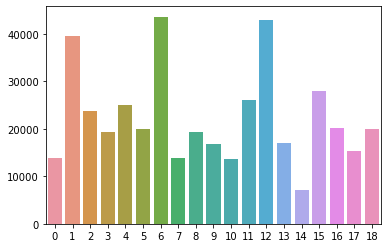

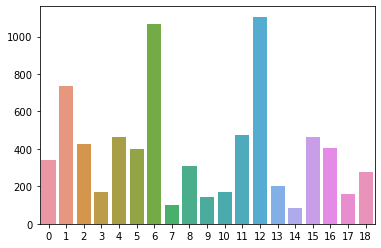

In [102]:
vc = data_train['behavior_id'].value_counts().sort_index()
sns.barplot(vc.index, vc.values)
plt.show()
vc = sub['behavior_id'].value_counts().sort_index()
sns.barplot(vc.index, vc.values)
plt.show()

In [107]:
from datetime import *
sub.to_csv('data/%s_sub%.5f.csv' %(date.today(),score), index=False)
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fragment_id  7500 non-null   int64
 1   behavior_id  7500 non-null   int64
dtypes: int64(2)
memory usage: 117.3 KB
